In [18]:
%matplotlib inline
import matplotlib
import statistics
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import cohen_kappa_score

In [3]:
GROUP = 6
MAX_PART = 14

# Preprocess

In [4]:
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']

col_names = ['Participant ID', 'Song ID'] + feature_names

dfs = []

for i in range(GROUP):
    for j in range(MAX_PART):
        filename = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)[:, 0:len(feature_names) + 1].tolist()
        for row in raw_data:
            row.insert(0, i * 100 + j)
            row[1] = int(row[1])
        dfs.append(pd.DataFrame(raw_data, columns=col_names))

evaluation = pd.concat(dfs).reset_index()
evaluation

,index,Participant ID,Song ID,Ornamentation,Grooviness,Familiarity,Liking,Consonance,Valence,Excitement,Vocal Range,Sound Quality,Tempo,Rhythmic Regularity,Vocal Tension,Vocal Texture
0,0,0,0,100.0,0.0,50.0,50.0,50.0,100.0,50.0,50.0,0.0,50.0,100.0,100.0,50.0
1,1,0,1,100.0,0.0,50.0,50.0,100.0,100.0,0.0,100.0,50.0,100.0,50.0,50.0,0.0
2,2,0,2,0.0,0.0,50.0,50.0,50.0,50.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0
3,3,0,3,100.0,50.0,50.0,50.0,50.0,100.0,50.0,50.0,0.0,100.0,100.0,100.0,50.0
4,4,0,4,0.0,0.0,50.0,0.0,50.0,50.0,100.0,50.0,50.0,50.0,0.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,509,25,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,0.0,100.0,50.0,50.0,50.0
311,1,509,26,100.0,0.0,50.0,0.0,0.0,50.0,50.0,50.0,0.0,50.0,50.0,100.0,50.0
312,2,509,27,100.0,0.0,50.0,50.0,50.0,50.0,50.0,100.0,50.0,0.0,50.0,50.0,100.0
313,3,509,28,100.0,100.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,100.0,50.0,50.0,100.0


# Intra-method Analysis

In [5]:
matrix = []
for group_id in range(GROUP):
    subset = evaluation[evaluation.apply(lambda x: x['Song ID'] >= group_id * 5 and x['Song ID'] < (group_id + 1) * 5, axis=1)]
    participants = subset.filter(items=['Participant ID'])
    participants = np.unique(participants.to_numpy().flatten())
    for x in participants:
        for y in participants:
            if x < y:
                for feature in feature_names:
                    data_x = subset[subset.apply(lambda t: t['Participant ID'] == x, axis=1)]
                    data_x = data_x.sort_values(by=['Song ID']).filter(items=[feature]).to_numpy().flatten()
                    
                    data_y = subset[subset.apply(lambda t: t['Participant ID'] == y, axis=1)]
                    data_y = data_y.sort_values(by=['Song ID']).filter(items=[feature]).to_numpy().flatten()

                    cohen = cohen_kappa_score(data_x, data_y, [0, 50, 100], weights='quadratic')
                    matrix.append([feature, cohen])

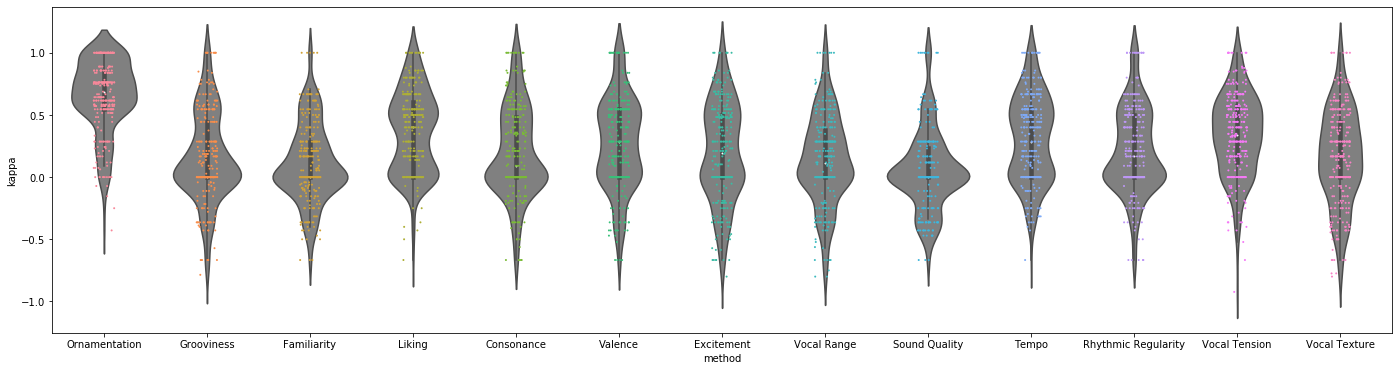

In [6]:
df = pd.DataFrame(matrix, index=range(len(matrix)), columns=['method', 'kappa'])

plt.figure(figsize=(24, 6))
sns.violinplot(x="method", y="kappa", data=df, color="0.5")
sns.stripplot(x="method", y="kappa", data=df, jitter=1, size=2)

plt.show()

# Inter-method Analysis

In [7]:
matrix_inter = []

In [8]:
for group_id in range(GROUP):
    subset = evaluation[evaluation.apply(lambda x: x['Song ID'] >= group_id * 5 and x['Song ID'] < (group_id + 1) * 5, axis=1)]
    participants = subset.filter(items=['Participant ID'])
    participants = np.unique(participants.to_numpy().flatten())
    for x in participants:
        for y in participants:
            if x < y:
                for feature in feature_names:
                    data_x = subset[subset.apply(lambda t: t['Participant ID'] == x, axis=1)]
                    data_x = data_x.sort_values(by=['Song ID']).filter(items=[feature]).to_numpy().flatten()
                    
                    data_y = subset[subset.apply(lambda t: t['Participant ID'] == y, axis=1)]
                    data_y = data_y.sort_values(by=['Song ID']).filter(items=[feature]).to_numpy().flatten()

                    cohen = cohen_kappa_score(data_x, data_y, [0, 50, 100], weights='quadratic')
                    matrix_inter.append(['Yamaha', cohen])

In [9]:
savage_2012_core = [0.36, 0.60, 0.08, 0.35, 0.22, 0.32, 0.32, 0.25, 0.38, 0.20, 0.48, 0.40, 0.37, 0.81, 0.53, 0.68, 0.62, 1.00, 0.25, 0.70, 0.39, 0.51, 0.62, 0.50, 0.64]
for val in savage_2012_core:
    matrix_inter.append(['Savage 2012 (CantoCore)', val])

savage_2012 = [0.36, 0.60, 0.08, 0.35, 0.22, 0.32, 0.32, 0.25, 0.38, 0.20, 0.48, 0.40, 0.37, 0.81, 0.53, 0.68, 0.62, 1.00, 0.25, 0.70, 0.39, 0.51, 0.62, 0.50, 0.64, 0.49, 0.29, 0.19, 0.14, 0.66, 0.31, 0.13, 0.46, 0.20, 0.25, 0.28, 0.15, 0.12, 0.24, 0.42, 0.14, 0.22, 0.07, -0.2, 0.34, 0.16, 0.04]
for val in savage_2012:
    matrix_inter.append(['Savage 2012 (Combined)', val])

savage_2015 = [0.905, 0.870, 0.850, 0.714, 0.441, 0.603, 0.571, 0.500, -0.043, 0.767, 0.426, 0.259, 0.578, 0.585, 0.532, 0.508, 0.260, 0.452, 0.386, 0.172, 0.363, 0.282, 0.189, 0.127, 0.086, -0.017, 0.649]
for val in savage_2015:
    matrix_inter.append(['Savage 2015', val])

mehr_2019 = [-0.64, -0.24, -0.85, -0.41, -0.34, -0.65, -0.51, -0.76, 0.26, 0.44, -0.37, 0.35, -0.44, -0.49, -0.46, 0.58, 0.62, -0.49, 0.61, -0.2, 0.27, 0.27, -0.46, -0.49, -0.23, -0.48, 0.42, -0.27, 0.25, -0.25, 0.14, 0.12]
for val in mehr_2019:
    matrix_inter.append(['Mehr 2019 (Penalized Logistic Regression)', val])

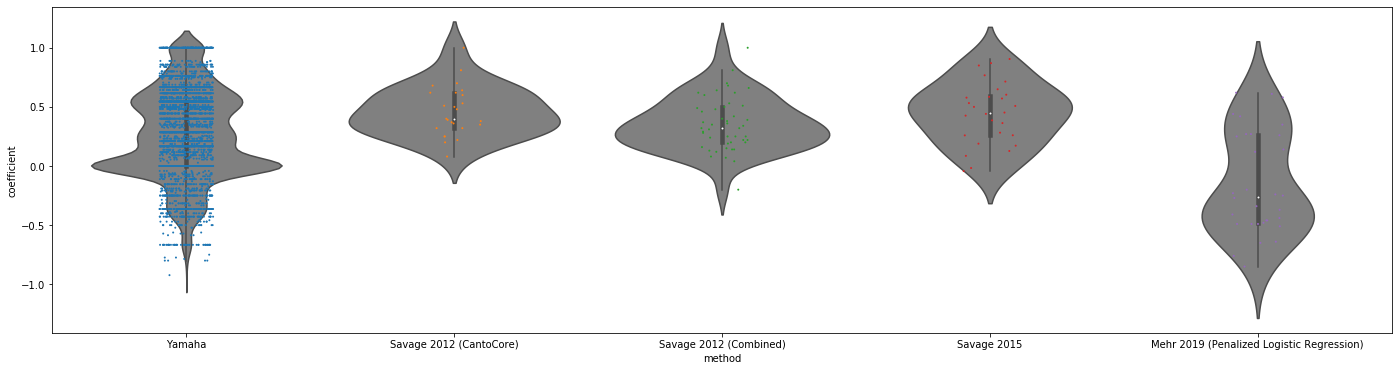

In [10]:
df = pd.DataFrame(matrix_inter, index=range(len(matrix_inter)), columns=['method', 'coefficient'])

plt.figure(figsize=(24, 6))
sns.violinplot(x="method", y="coefficient", data=df, color="0.5")
sns.stripplot(x="method", y="coefficient", data=df, jitter=1, size=2)

plt.show()

In [21]:
yamaha_flat = list(filter(lambda x: not math.isnan(x) , map(lambda x: x[1], matrix_inter)))

print("Yamaha Data Avg:", statistics.mean(yamaha_flat), "Stdev:", statistics.stdev(yamaha_flat))
print("Savage 2012 (CantoCore) Avg:", statistics.mean(savage_2012_core), "Stdev:", statistics.stdev(savage_2012_core))
print("Savage 2012 (Combined) Avg:", statistics.mean(savage_2012), "Stdev:", statistics.stdev(savage_2012))
print("Savage 2015 Avg:", statistics.mean(savage_2015), "Stdev:", statistics.stdev(savage_2015))
print("Mehr 2019 (Penalized Logistic Regression) Avg:", statistics.mean(mehr_2019), "Stdev:", statistics.stdev(mehr_2019))

Yamaha Data Avg: 0.24434316917706816 Stdev: 0.375444688964049
Savage 2012 (CantoCore) Avg: 0.4632 Stdev: 0.2115955261026723
Savage 2012 (Combined) Avg: 0.3548936170212766 Stdev: 0.2268103243224202
Savage 2015 Avg: 0.445 Stdev: 0.2626991552210364
Mehr 2019 (Penalized Logistic Regression) Avg: -0.146875 Stdev: 0.43519693354588557
